In [8]:
#b63b338108597a1b1b21d5743811a71f1684d15ee5bca7ec
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
from subprocess import check_output
Instacart_dir = "/home/lius/kaggle/Instacart"
print(check_output(["ls", Instacart_dir+"/input"]).decode("utf8"))

order_products_train_df = pd.read_csv(Instacart_dir+"/input/order_products__train.csv")
order_products_prior_df = pd.read_csv(Instacart_dir+"/input/order_products__prior.csv")
orders_df = pd.read_csv(Instacart_dir+"/input/orders.csv")
products_df = pd.read_csv(Instacart_dir+"/input/products.csv")
aisles_df = pd.read_csv(Instacart_dir+"/input/aisles.csv")
departments_df = pd.read_csv(Instacart_dir+"/input/departments.csv")

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



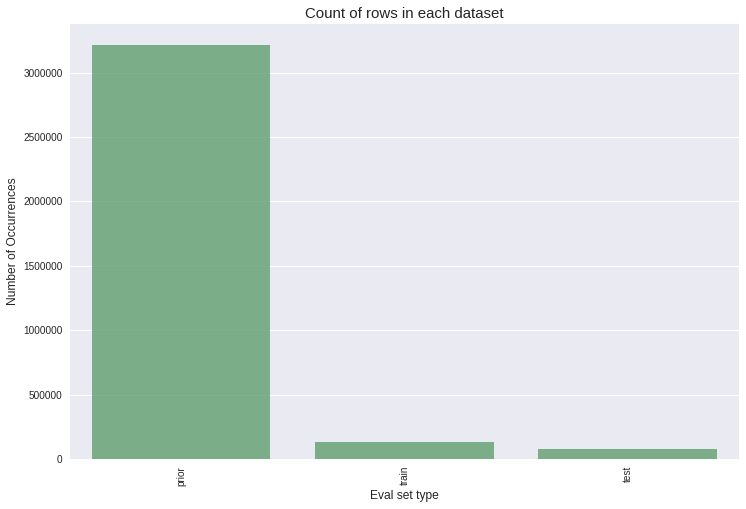

In [11]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
userx_orders = orders_df[orders_df.user_id == 2]
order_products_df = pd.concat([order_products_prior_df,order_products_train_df], ignore_index=True)
userx_oproducts = pd.merge(userx_orders, order_products_df, on='order_id')
userx_oproducts = pd.merge(userx_oproducts, products_df, on='product_id')
userx_oproducts = pd.merge(userx_oproducts, aisles_df, on='aisle_id')
userx_oproducts = pd.merge(userx_oproducts, departments_df, on='department_id')

In [47]:
group = userx_oproducts.groupby('product_id')
data_lius = pd.DataFrame(group['order_id'].count())
data_lius.sort_index(axis=1, ascending=True)
data_lius

,order_id
product_id,
23,1
79,1
1559,6
2002,4
2573,2
3151,1
4071,1
4957,1
5212,1


In [55]:
#orders_df.head(30)
userx_oproducts[userx_oproducts.eval_set == 'train']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
9,1492625,2,train,15,1,11,30.0,32792,4,1,Chipotle Beef & Pork Realstick,23,19,popcorn jerky,snacks
27,1492625,2,train,15,1,11,30.0,16589,3,1,Plantain Chips,107,19,chips pretzels,snacks
41,1492625,2,train,15,1,11,30.0,45645,29,0,Dark Chocolate Nuts & Sea Salt Bars,3,19,energy granola bars,snacks
45,1492625,2,train,15,1,11,30.0,11913,28,0,Shelled Pistachios,117,19,nuts seeds dried fruit,snacks
46,1492625,2,train,15,1,11,30.0,38547,13,0,Bubblegum Flavor Natural Chewing Gum,46,19,mint gum,snacks
55,1492625,2,train,15,1,11,30.0,45066,9,1,Honeycrisp Apple,24,4,fresh fruits,produce
65,1492625,2,train,15,1,11,30.0,24852,8,1,Banana,24,4,fresh fruits,produce
76,1492625,2,train,15,1,11,30.0,41787,5,1,Bartlett Pears,24,4,fresh fruits,produce
78,1492625,2,train,15,1,11,30.0,5450,11,1,Small Hass Avocado,24,4,fresh fruits,produce
83,1492625,2,train,15,1,11,30.0,22825,6,1,Organic D'Anjou Pears,24,4,fresh fruits,produce
